In [1]:
library(tidyverse)
library(Rtsne)
if (!exists("mdpre")) mdpre <- function(x) { print(x) }
if (!exists("ggmd"))  ggmd  <- function(p) { print(p) }

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
#1.1 Question 1

In [3]:
#a)
wine <- read_csv("homework/Assignment5/wine.csv")

Rows: 178 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): Alcohol, Malicacid, Ash, Alcalinity_of_ash, Magnesium, Total_pheno...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
#b)
str(wine)

spc_tbl_ [178 × 14] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Alcohol                     : num [1:178] 14.2 13.2 13.2 14.4 13.2 ...
 $ Malicacid                   : num [1:178] 1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 ...
 $ Ash                         : num [1:178] 2.43 2.14 2.67 2.5 2.87 2.45 2.45 2.61 2.17 2.27 ...
 $ Alcalinity_of_ash           : num [1:178] 15.6 11.2 18.6 16.8 21 15.2 14.6 17.6 14 16 ...
 $ Magnesium                   : num [1:178] 127 100 101 113 118 112 96 121 97 98 ...
 $ Total_phenols               : num [1:178] 2.8 2.65 2.8 3.85 2.8 3.27 2.5 2.6 2.8 2.98 ...
 $ Flavanoids                  : num [1:178] 3.06 2.76 3.24 3.49 2.69 3.39 2.52 2.51 2.98 3.15 ...
 $ Nonflavanoid_phenols        : num [1:178] 0.28 0.26 0.3 0.24 0.39 0.34 0.3 0.31 0.29 0.22 ...
 $ Proanthocyanins             : num [1:178] 2.29 1.28 2.81 2.18 1.82 1.97 1.98 1.25 1.98 1.85 ...
 $ Color_intensity             : num [1:178] 5.64 4.38 5.68 7.8 4.32 6.75 5.25 5.05 5.2 7.22 ...
 $ Hu

In [5]:
#c)
summary(wine)

    Alcohol        Malicacid          Ash        Alcalinity_of_ash
 Min.   :11.03   Min.   :0.740   Min.   :1.360   Min.   :10.60    
 1st Qu.:12.36   1st Qu.:1.603   1st Qu.:2.210   1st Qu.:17.20    
 Median :13.05   Median :1.865   Median :2.360   Median :19.50    
 Mean   :13.00   Mean   :2.336   Mean   :2.367   Mean   :19.49    
 3rd Qu.:13.68   3rd Qu.:3.083   3rd Qu.:2.558   3rd Qu.:21.50    
 Max.   :14.83   Max.   :5.800   Max.   :3.230   Max.   :30.00    
   Magnesium      Total_phenols     Flavanoids    Nonflavanoid_phenols
 Min.   : 70.00   Min.   :0.980   Min.   :0.340   Min.   :0.1300      
 1st Qu.: 88.00   1st Qu.:1.742   1st Qu.:1.205   1st Qu.:0.2700      
 Median : 98.00   Median :2.355   Median :2.135   Median :0.3400      
 Mean   : 99.74   Mean   :2.295   Mean   :2.029   Mean   :0.3619      
 3rd Qu.:107.00   3rd Qu.:2.800   3rd Qu.:2.875   3rd Qu.:0.4375      
 Max.   :162.00   Max.   :3.880   Max.   :5.080   Max.   :0.6600      
 Proanthocyanins Color_intensity  

In [6]:
#1.2 Question 2

In [7]:
#a)
wine_scaled <- wine %>%
     mutate(across(-class, ~ as.numeric(scale(.))))
 View(wine_scaled)

Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.51434077,-0.56066822,0.23139979,-1.16630317,1.90852151,0.8067217,1.0319081,-0.65770780,1.22143845,0.251008784,0.3611585,1.84272147,1.01015939,1
0.24559683,-0.49800856,-0.82566722,-2.48384052,0.01809398,0.5670481,0.7315653,-0.81841060,-0.54318872,-0.292496232,0.4049085,1.11031723,0.96252635,1
0.19632522,0.02117152,1.10621386,-0.26798225,0.08810981,0.8067217,1.2121137,-0.49700500,2.12995937,0.268262912,0.3174085,0.78636920,1.39122370,1
1.68679140,-0.34583508,0.48655389,-0.80697481,0.92829983,2.4844372,1.4623994,-0.97911340,1.02925134,1.182731669,-0.4263410,1.18074072,2.32800680,1
0.29486844,0.22705328,1.83522559,0.45067448,1.27837900,0.8067217,0.6614853,0.22615759,0.40027531,-0.318377423,0.3611585,0.44833648,-0.03776747,1
1.47738706,-0.51591132,0.30430096,-1.28607930,0.85828399,1.5576991,1.3622851,-0.17559941,0.66234866,0.729810822,0.4049085,0.33565890,2.23274072,1
1.71142720,-0.41744613,0.30430096,-1.46574348,-0.26196936,0.3273744,0.4912911,-0.49700500,0.67982021,0.082781041,0.2736585,1.36384178,1.72465497,1
1.30493643,-0.16680747,0.88751034,-0.56742256,1.48842650,0.4871569,0.4812796,-0.41665360,-0.59560339,-0.003489596,0.4486584,1.36384178,1.74053265,1
2.25341491,-0.62332789,-0.71631546,-1.64540766,-0.19195352,0.8067217,0.9518167,-0.57735640,0.67982021,0.061213382,0.5361584,0.33565890,0.94664867,1


In [9]:
#b) Scaling and centering data is generally good practice before performing a PCA, because the PCA is a rotation, and you want to rotate around the center of the data. It is especially important when the variable importance is unknown and there are consistently occurring spikes, like in the wine data. The summary statistic showed large variation
#between values for the different variables, like Proline (values in the 1000s) and Hue (values less than 1). Without scaling, this would lead the PCA to cause unequal variance, even
#though the importance of the variables is unknown. Thus by scaling and centering each variable will have equal variance to the principal components, and the ability to analyze the data 
#based on true variance, not magnitude. 

In [10]:
#1.3 Question 3 

In [11]:
#a) 
PCA<-prcomp(wine_scaled)
PCA
summary(PCA)

Standard deviations (1, .., p=14):
 [1] 2.2797841 1.5802028 1.2025279 0.9608805 0.9317684 0.8131917 0.7435811
 [8] 0.5910663 0.5401830 0.5078404 0.4752135 0.4108322 0.3424757 0.2085970

Rotation (n x k) = (14 x 14):
                                      PC1          PC2           PC3
Alcohol                      -0.139554110 -0.483986584 -0.2073937774
Malicacid                     0.231278771 -0.224052306  0.0888801156
Ash                          -0.000758731 -0.315929724  0.6261495205
Alcalinity_of_ash             0.230293094  0.011263089  0.6120248225
Magnesium                    -0.131041028 -0.300236426  0.1308963493
Total_phenols                -0.372792367 -0.066404359  0.1463803150
Flavanoids                   -0.403237284  0.002017377  0.1508538950
Nonflavanoid_phenols          0.278847444 -0.027604752  0.1701277248
Proanthocyanins              -0.291925075 -0.040561908  0.1497147503
Color_intensity               0.089426322 -0.529856997 -0.1372817801
Hue                      

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.2798 1.5802 1.2025 0.96088 0.93177 0.81319 0.74358
Proportion of Variance 0.3821 0.1836 0.1063 0.06789 0.06383 0.04862 0.04065
Cumulative Proportion  0.3821 0.5657 0.6721 0.73995 0.80378 0.85241 0.89306
                           PC8     PC9    PC10   PC11    PC12    PC13   PC14
Standard deviation     0.59107 0.54018 0.50784 0.4752 0.41083 0.34248 0.2086
Proportion of Variance 0.02569 0.02145 0.01896 0.0166 0.01241 0.00862 0.0032
Cumulative Proportion  0.91875 0.94020 0.95916 0.9758 0.98818 0.99680 1.0000

In [12]:
#b) PC1 accounts for 38.21% and PC2 accounts for 18.36% of the total variance. Collectively, they account for 56.57% of the total variance. Use summary(PCA) to see this. 

In [13]:
#c) The PCA is performed first because it can simplify data by reducing noise while retaining the overall information. It allows for an initial visualization and reveal hidden paterrns
#necessary for further analysis like a t-SNE. 

In [14]:
#d)
PCA_rotationmatrix<-solve(PCA$rotation)
head(PCA_rotationmatrix)

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
PC1,-0.13955411,0.23127877,-0.000758731,0.23029309,-0.1310410,-0.37279237,-0.403237284,0.27884744,-0.29192508,0.08942632,-0.28473150,-0.3606499,-0.27641244,0.3110235281
PC2,-0.48398658,-0.22405231,-0.315929724,0.01126309,-0.3002364,-0.06640436,0.002017377,-0.02760475,-0.04056191,-0.52985700,0.27836463,0.1633682,-0.36566189,-0.0048166342
PC3,-0.20739378,0.08888012,0.626149520,0.61202482,0.1308963,0.14638031,0.150853895,0.17012772,0.14971475,-0.13728178,0.08528722,0.1661269,-0.12670975,0.0009623389
PC4,-0.05202454,0.50792619,-0.234839101,0.06750549,-0.2552814,0.19504272,0.148853644,-0.27078415,0.43527140,0.06919472,-0.43609564,0.1710480,-0.24708206,0.0785549229
PC5,0.26128775,0.09224016,0.120560926,-0.05695664,-0.7596183,0.14215523,0.107843453,0.47058669,-0.12361143,0.05497895,0.09789420,0.1252510,0.12092559,-0.1301334861
PC6,0.16536102,0.58008658,0.125924371,-0.09534441,0.1047926,-0.12544691,-0.046749718,-0.25340042,-0.49254225,-0.42598886,0.05092636,0.2365242,0.08811233,-0.1665133820


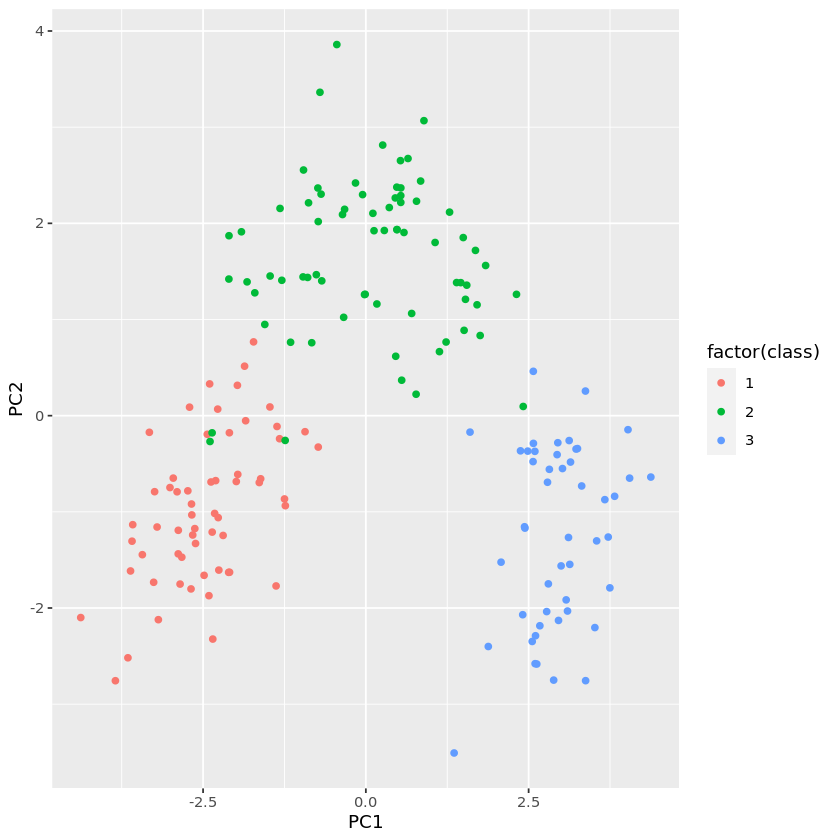

In [15]:
#e)
pca_scores <- as_tibble(PCA$x) %>%
     mutate(class = wine$class) 
ggmd(
  ggplot(pca_scores, aes(x = PC1, y = PC2, color = factor(class))) +
    geom_point()
)

In [16]:
#f) After plotting PC1 vs PC2, the PCA was mostly effective at distinguishing between the three classes. Class 1 and Class 3 from clear separate clusters. Class 2 had some overlap with Class 1 and 3. 
#This means that Class 1 and Class 3 are distinctly different, while Class 2 shares some similarities with Class 1 and Class 3. By only examining the 1st and 2nd principal components helps to seperate
#the wine classes, but not completely. 

In [17]:
#g) The PCA would fail when the data set only has one notable degree of variation. An example of this is data that forms concentric circles. In this data set the radius is the main variation, with data spread around it.
#No rotation is able to separate two axes and thus the PCA will fail. 

In [18]:
#h)A vector space is a combination of a set and a field that operates using specific axioms that can combine data points linearly. This is restrictive and often does not make sense for most real data.
#A manifold is a better representation of most data because it locally behaves like a vector space, but globally has a more complex structure. This applies to the T-SNE because it looks at local relationships between points
#like the probability of two points being neighbors. The t-SNE can be used for optimizing the placement of points based on the local relationship, making it useful for manifolds. When the PCA was performed
#on the Wine data, it mostly worked, showing distinctions between Class 1 and Class 3 and some overlap with Class 2. This overlap shows that some of the data may have some nonlinear relationships, indicating it may be a manifold. 
#Conducting a t-SNE will show a better visualization if it is a manifold by focusing on the local relationships between the Classes. 

In [19]:
#1.4 Question 4

In [20]:
#a)
pca_subset <- as_tibble(PCA$x[, 1:10]) %>%   
     mutate(class = wine$class)                
 pca_noduplicate <- pca_subset %>% distinct()
 tsne_input <- pca_noduplicate %>% select(-class)  
set.seed(123)
tsne_result <- Rtsne(tsne_input, dims = 2, perplexity = 30, verbose = FALSE, check_duplicates = FALSE)

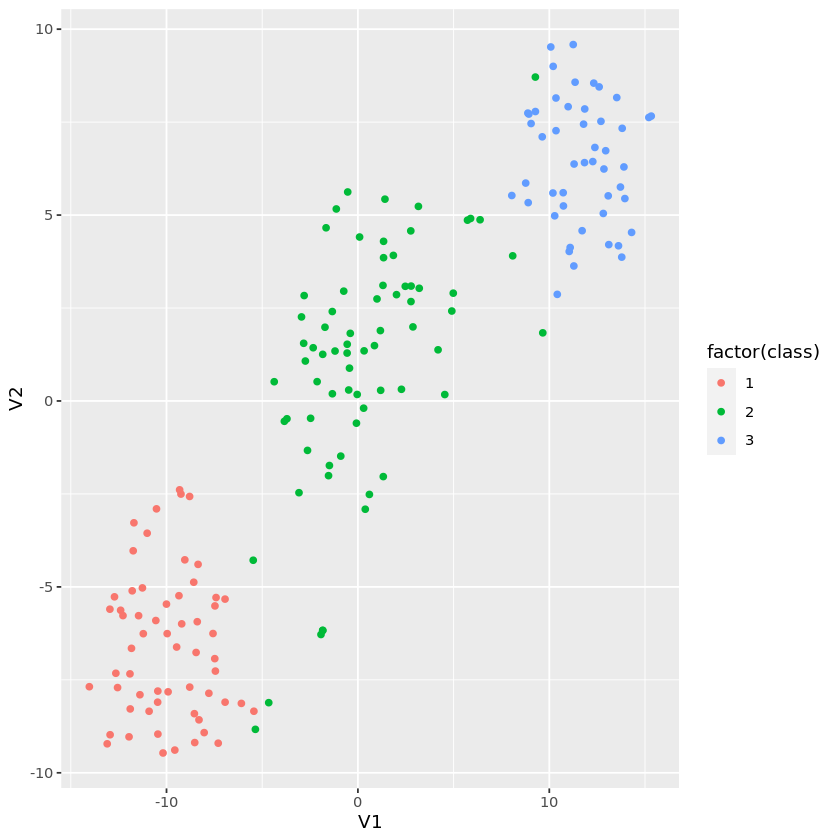

In [23]:
#b)
tsne_results <- as_tibble(tsne_result$Y) %>%
  mutate(class = pca_noduplicate$class)
ggmd(
  ggplot(tsne_results, aes(V1, V2)) +
    geom_point(aes(color = factor(class)))
)

In [24]:
#c)The homework asked for a t-SNE to be performed because the data was non-linear, and PCA only captures relationships of linear data. 
#Additionally, PCA produces a rotation matrix that can be applied to new data, making it optimal for preprocessing and generalization. 
#t-SNE can capture local neighborhoods and nonlinear patterns by optimizing the placement of points without transforming new data into the same space. 
#t-SNE is optimal for visualization over PSA. 

In [25]:
#d)This workflow would be good for other high-dimensional data that occupies a much lower-dimensional manifold within that high-dimensional space. This can occur when there are many highly correlated variables like in text data. 